In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
# Load the JSON file into a DataFrame
data = pd.read_json('../data/logins.json')
display(data.head(5))

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [73]:
print(data.shape)
print(data.info(verbose=True))
print(data.describe())

(93142, 1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB
None
                 login_time
count                 93142
unique                92265
top     1970-03-17 01:01:39
freq                      3
first   1970-01-01 20:12:16
last    1970-04-13 18:57:38


/var/folders/mz/ry3t45m14wz2fbn7ln93113h0000gn/T/ipykernel_34300/1327427486.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(data.describe())


In [74]:
# Convert login_time column to datetime format
data['login_time'] = pd.to_datetime(data['login_time'])

data.set_index('login_time', inplace=True)

/var/folders/mz/ry3t45m14wz2fbn7ln93113h0000gn/T/ipykernel_34300/1598321373.py:13: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  temp = getattr(data.index, time).value_counts().sort_index()


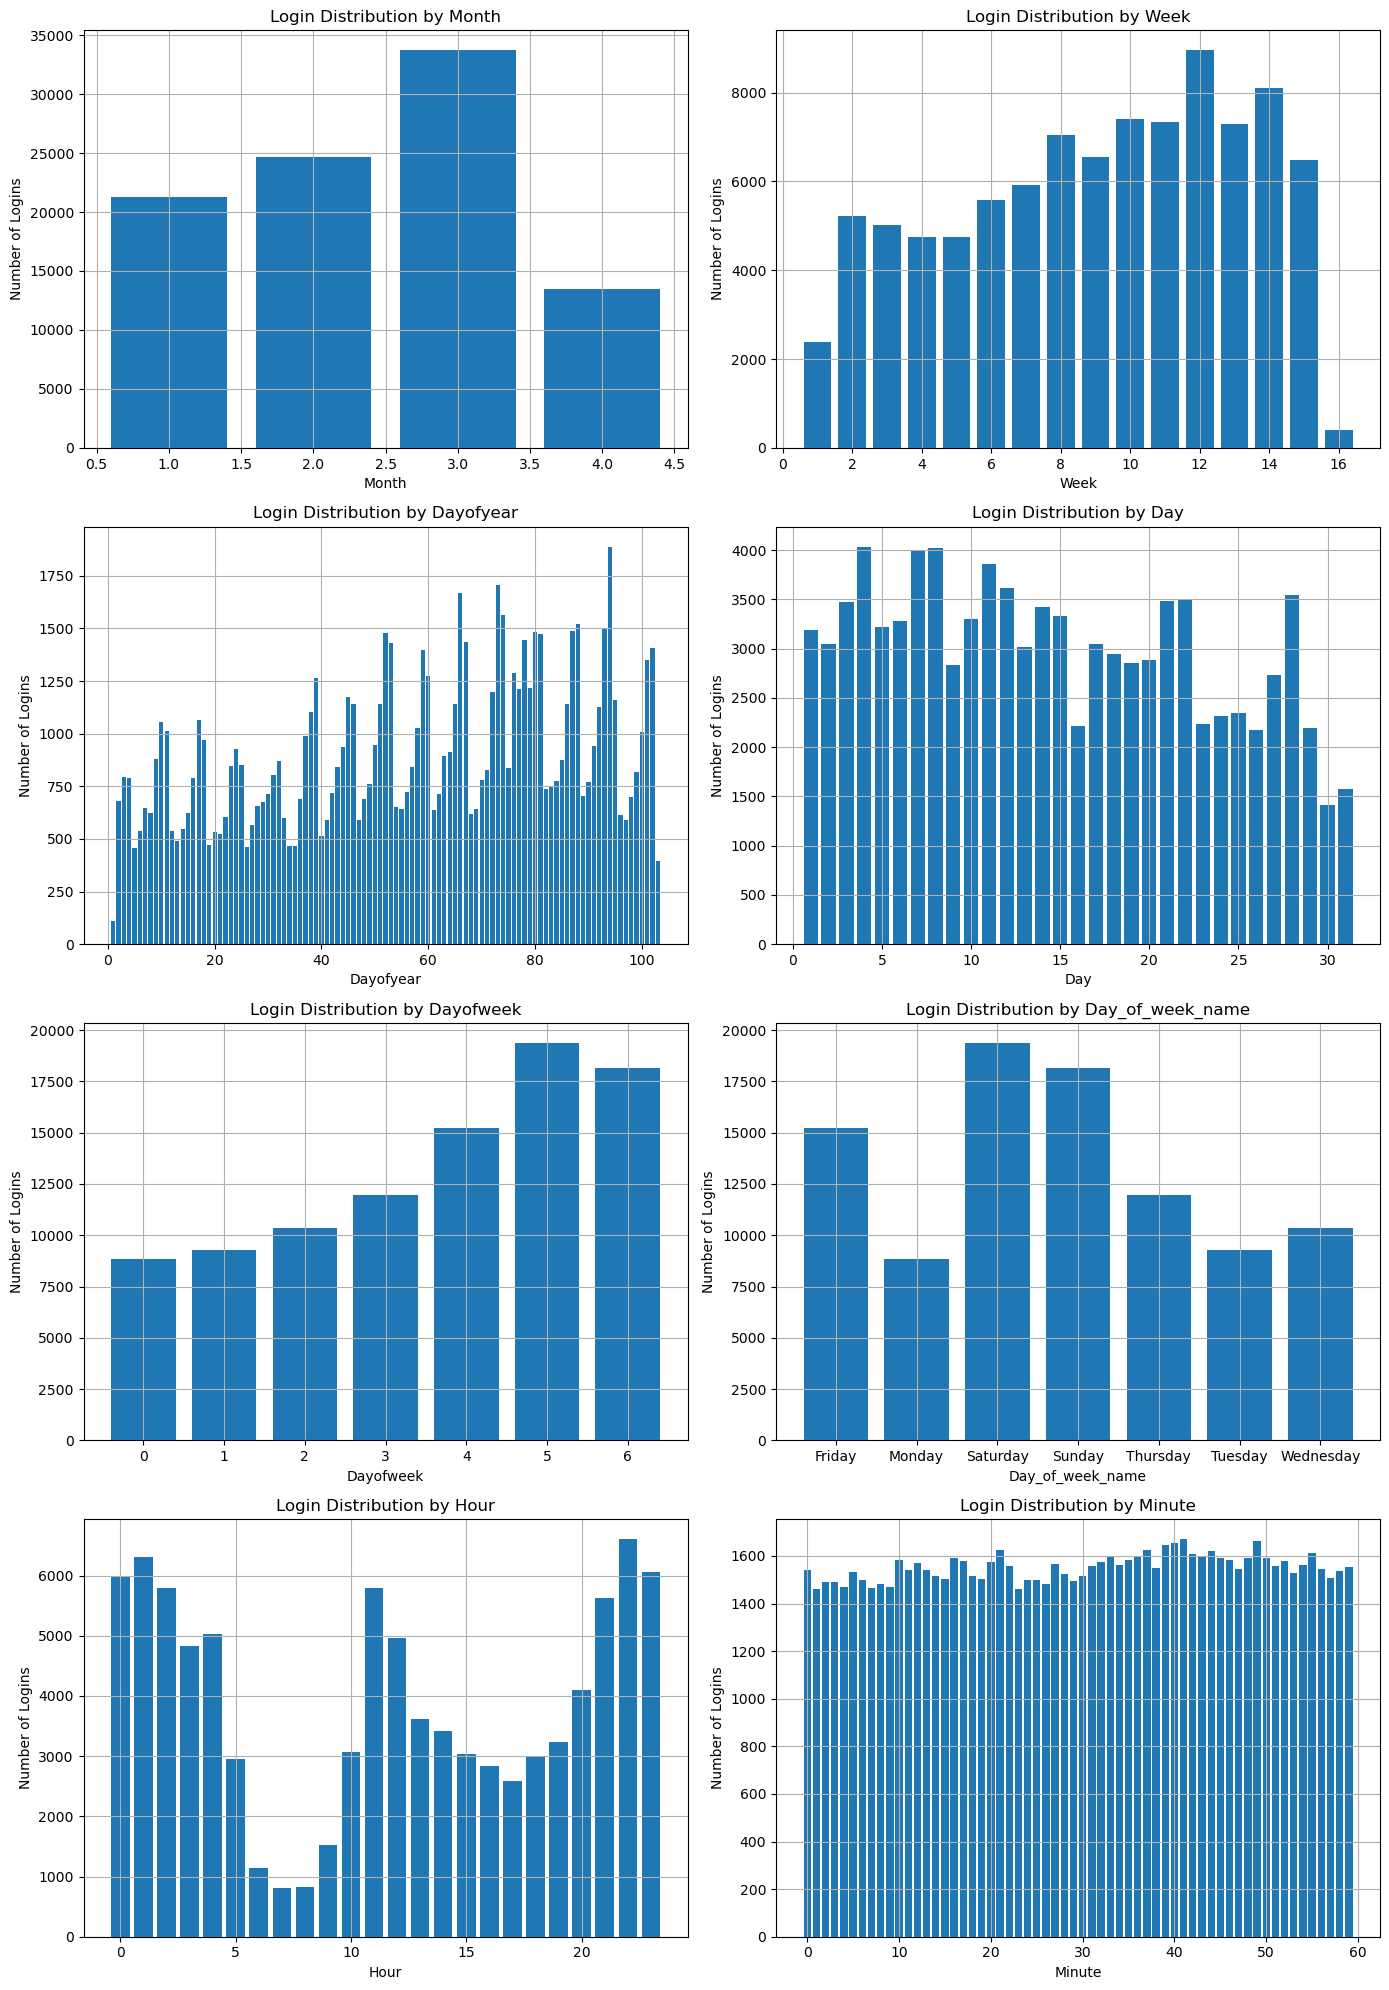

In [71]:
times = ['month','week','dayofyear','day','dayofweek','day_of_week_name','hour','minute','second']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 20))
axes = axes.flatten()  # Flatten to iterate easily

# Plot each time component
for ax, time in zip(axes, times):
    if time == 'day_of_week_name':
        temp = data.index.day_name().value_counts().sort_index()
    else:
        temp = getattr(data.index, time).value_counts().sort_index()

    ax.bar(temp.index, temp.values)
    ax.set_title(f'Login Distribution by {time.capitalize()}')
    ax.set_xlabel(f'{time.capitalize()}')
    ax.set_ylabel('Number of Logins')
    ax.grid(True)

plt.tight_layout()
plt.show()


In [76]:
### Resample the data to 15-minute intervals, counting the number of logins per interval
login_counts = data.resample('15T').size()

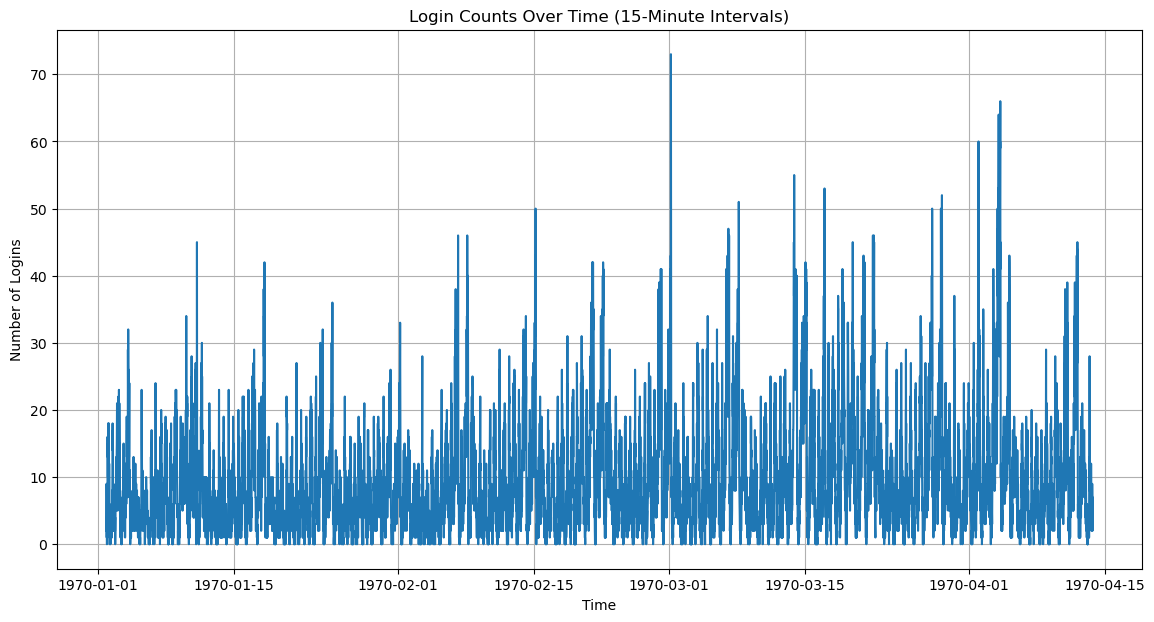

In [77]:
# Plot the time series of login counts
plt.figure(figsize=(14, 7))
plt.plot(login_counts.index, login_counts, linestyle='-')
plt.title('Login Counts Over Time (15-Minute Intervals)')
plt.xlabel('Time')
plt.ylabel('Number of Logins')
plt.grid(True)
plt.show()

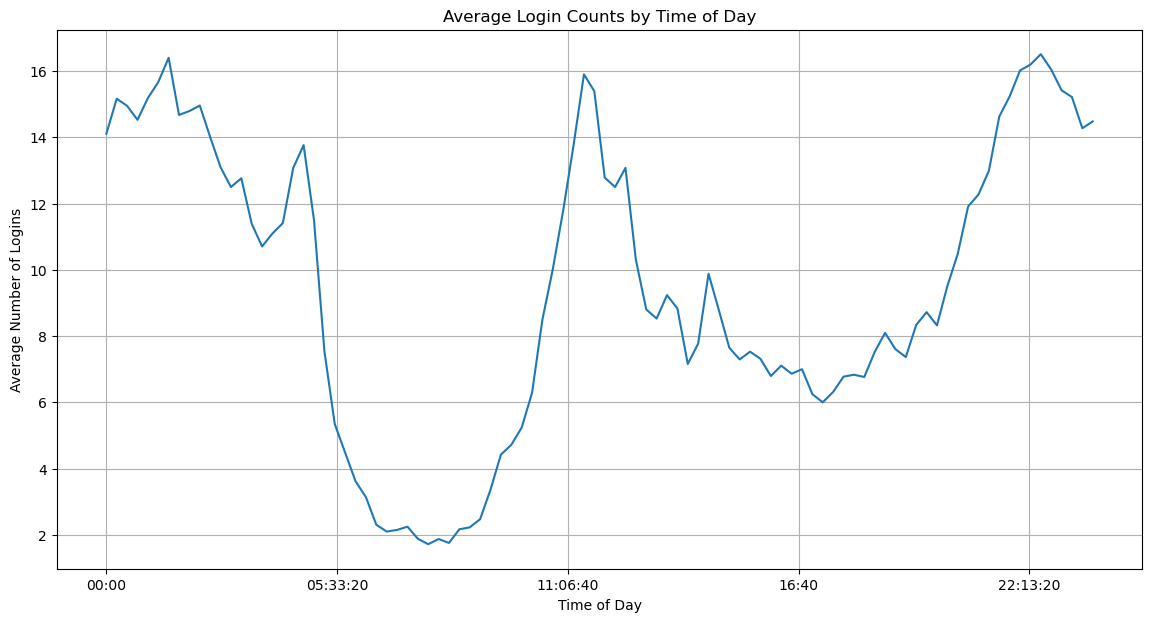

In [11]:
# Identify daily patterns
login_counts.groupby(login_counts.index.time).mean().plot(figsize=(14, 7))
plt.title('Average Login Counts by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Number of Logins')
plt.grid(True)
plt.show()



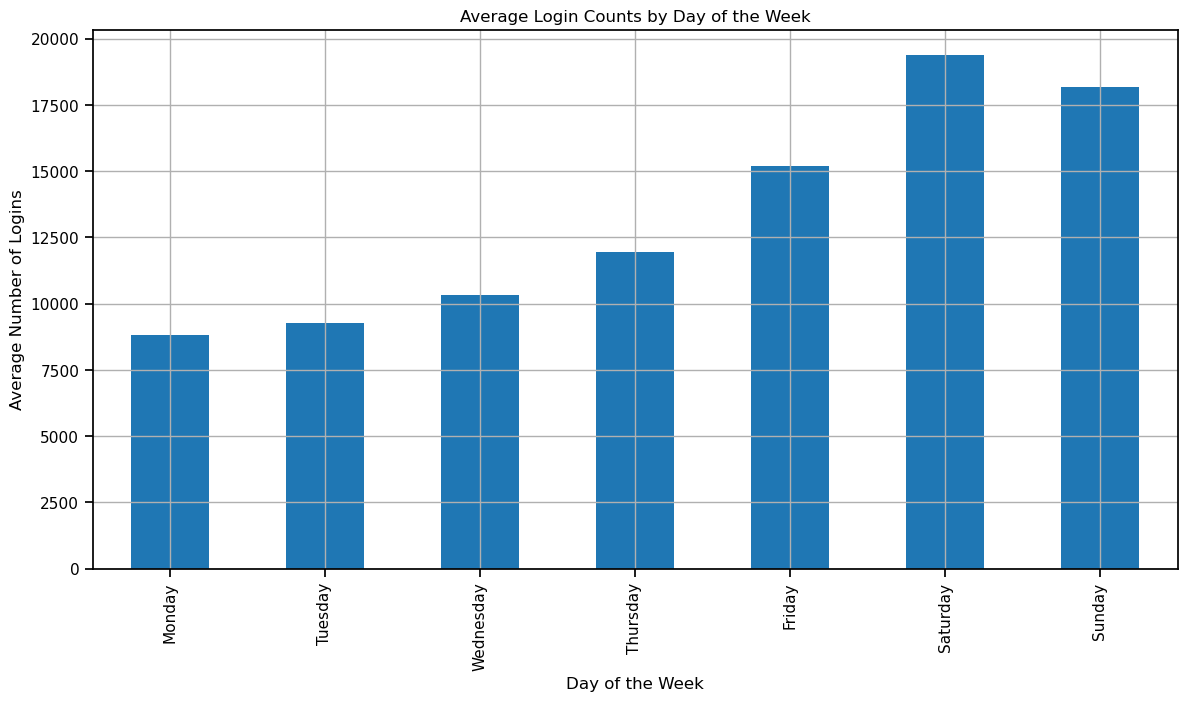

In [88]:
login_counts_by_day = data.groupby(data.index.day_name()).size()

# Order the days of the week from Monday to Sunday
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
login_counts_by_day = login_counts_by_day.reindex(day_order)

login_counts_by_day.plot(kind='bar', figsize=(14, 7))
plt.title('Average Login Counts by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Logins')
plt.grid(True)
plt.show()

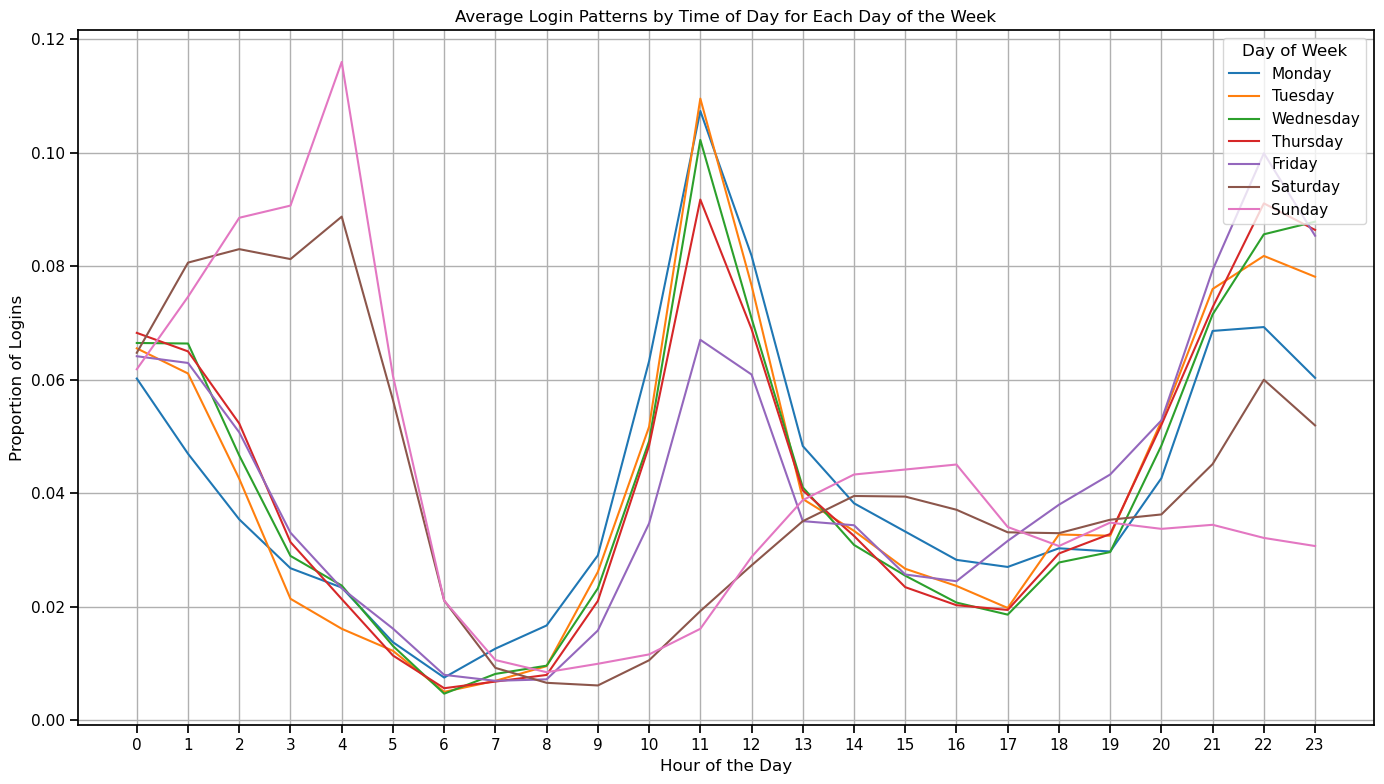

In [90]:
data['hour'] = data.index.hour
data['day_of_week'] = data.index.day_name()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group by hour and day of the week to calculate average login counts
hourly_patterns = data.groupby(['hour', 'day_of_week']).size().unstack(fill_value=0)

hourly_patterns = hourly_patterns.reindex(columns=day_order)

#  average login counts by hour for each day of the week
hourly_patterns_avg = hourly_patterns.div(hourly_patterns.sum(axis=0), axis=1)


plt.figure(figsize=(14, 8))
for day in hourly_patterns_avg.columns:
    plt.plot(hourly_patterns_avg.index, hourly_patterns_avg[day], label=day)

plt.title('Average Login by Time of Day for Each Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Proportion of Logins')
plt.legend(title='Day of Week', loc='upper right')
plt.grid(True)
plt.xticks(range(0, 24))  # Set x-ticks to each hour
plt.tight_layout()
plt.show()


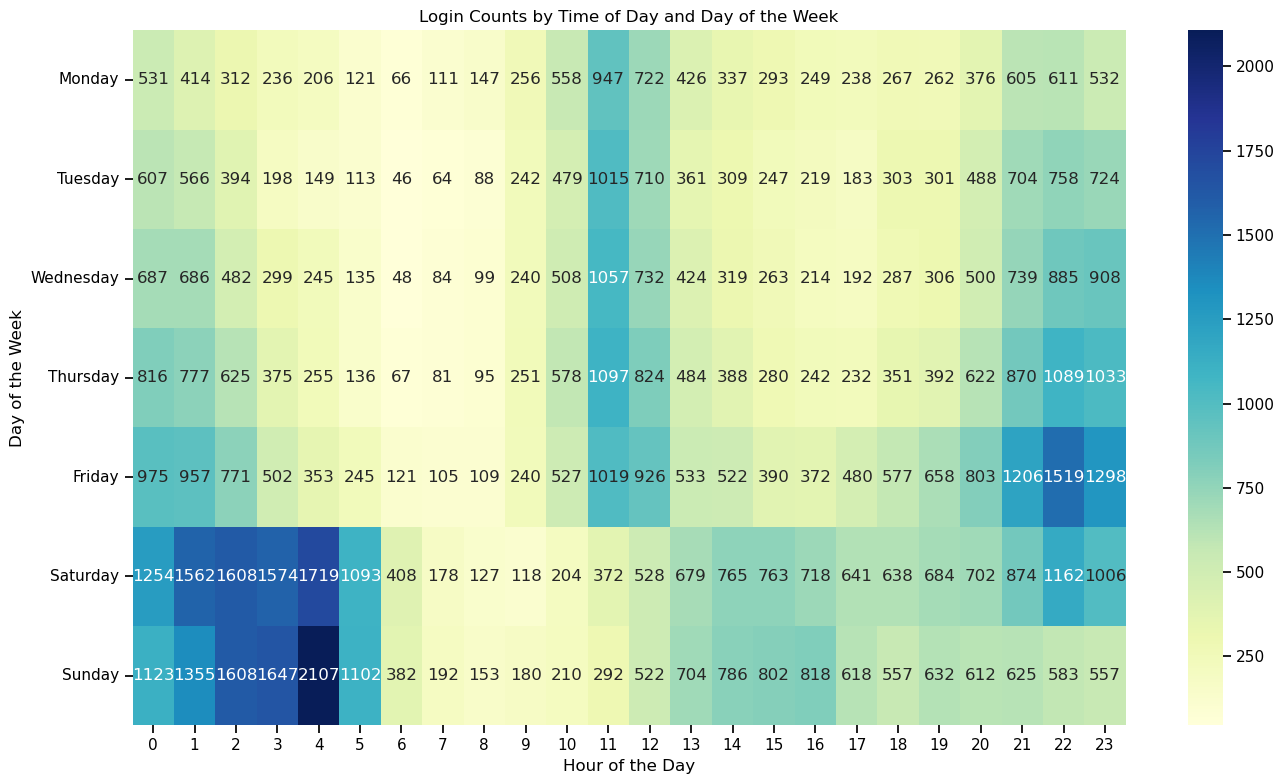

In [91]:
plt.figure(figsize=(14, 8))
sns.heatmap(hourly_patterns.T, cmap="YlGnBu", annot=True, fmt="d")
plt.title('Login Counts by Time of Day and Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()